In [1]:
import pandas as pd
from src import *
import joblib

Class Distribution:
 Status
Normal                  11264
Depression              10635
Suicidal                 7452
Anxiety                  2586
Bipolar                  1801
Stress                   1680
Personality disorder      662
Name: count, dtype: int64


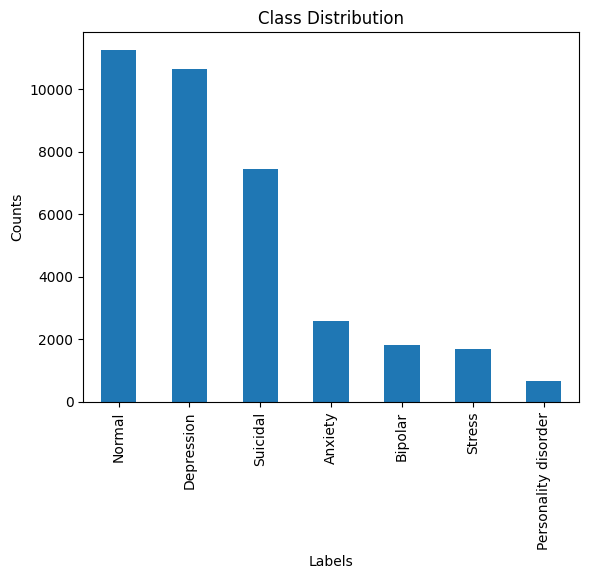

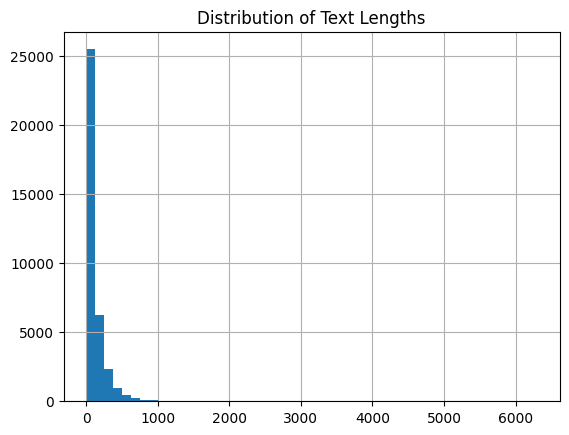

In [2]:
#Load Data and drop nulls
df = load_data("data/Sentiment_analysis_dataset.csv")
df = clean_data(df)
check_class_distribution(df)
df = add_text_length(df)
check_text_length_distribution(df)
    

None


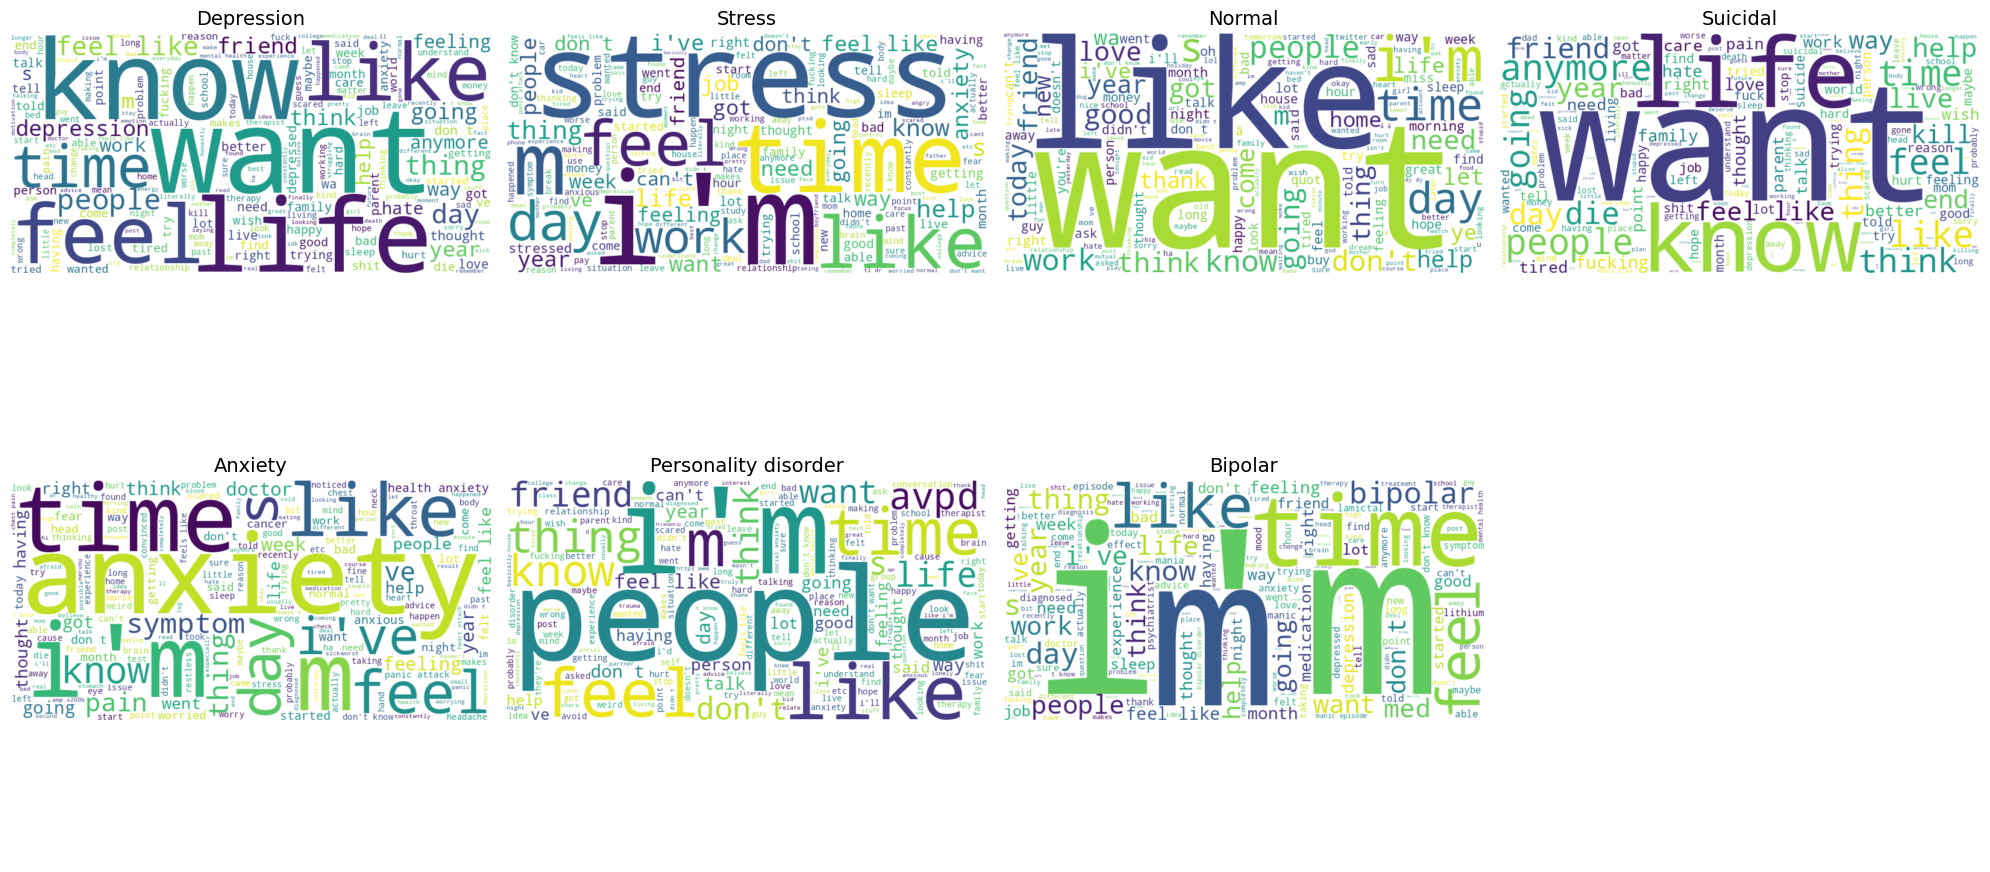

In [3]:
# Clean text

if not os.path.exists("clean_df.pkl"):
    df['CleanText'] = df['Statement'].apply(preprocess)
    joblib.dump(df, "clean_df.pkl")
else:
    df = joblib.load("clean_df.pkl")
    
if not os.path.exists("word_freq.pkl"):
    freq_data = get_clean_word_freq(df)
    joblib.dump(freq_data, "word_freq.pkl")
else:
    freq_data = joblib.load("word_freq.pkl")
    print(freq_data)
    
visualize_word_clouds(df)


In [4]:
# # Extract features
X_tfidf, tfidf = extract_features(df)
y, le = encode_labels(df)
    
# # Split data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X_tfidf, y)
    
# # # Handle class imbalance
X_train_resampled, y_train_resampled = handle_imbalance(X_train, y_train)


Train size: 28864 | Val: 3608 | Test: 3608


In [5]:
# Train Logistic regression model
lr_model = load_model_if_exists("LogisticRegression")

if lr_model is None:
    lr_model = train_lr_model(X_train_resampled, y_train_resampled)
    evaluate_model(lr_model, X_val, y_val, le)
    save_model(lr_model)

Model 'LogisticRegression' already exists. Loading from file.


In [6]:
#train random forest model
rf_model = load_model_if_exists("RandomForestClassifier")

if rf_model is None:
    rf_model = train_rf_model(X_train_resampled, y_train_resampled)
    evaluate_model(rf_model, X_val, y_val, le)
    save_model(rf_model)

Model 'RandomForestClassifier' already exists. Loading from file.


In [7]:
#train naive bayes model
nb_model = load_model_if_exists("MultinomialNB")

if nb_model is None:
    nb_model = train_nb_model(X_train_resampled, y_train_resampled)
    evaluate_model(nb_model, X_val, y_val, le)
    save_model(nb_model)

Model 'MultinomialNB' already exists. Loading from file.


In [8]:
#train neural network
cnn_model = load_model_if_exists("Sequential")

if cnn_model is None:
    cnn_model = train_cnn_model(X_train_resampled, y_train_resampled, X_val, y_val, y_test)
    evaluate_model_nn(cnn_model, X_val, y_val, le)
    save_model(cnn_model)

Model 'Sequential' already exists. Loading from file.


In [9]:
#train xgboost model
xgb_model = load_model_if_exists("XGBClassifier")

if xgb_model is None:
    xgb_model = train_xgb_model(X_train_resampled, y_train_resampled)
    evaluate_model(xgb_model, X_val, y_val, le)
    save_model(xgb_model)

Model 'XGBClassifier' already exists. Loading from file.


In [10]:
#saving the dataset
df.to_csv("data/cleaned_sentiment_dataset.csv", index=False)

In [11]:
#viewing all of the models
summary_of_models()

                    Model  Accuracy  Macro Precision  Macro Recall  Macro F1  \
4           XGBClassifier  0.737805         0.683894      0.655823  0.664036   
0      LogisticRegression  0.697894         0.616719      0.673149  0.634510   
2           NeuralNetwork  0.702051         0.646992      0.587410  0.609876   
3  RandomForestClassifier  0.701220         0.672678      0.583458  0.607547   
1           MultinomialNB  0.587860         0.503659      0.608263  0.518684   

   Weighted Precision  Weighted Recall  Weighted F1  
4            0.735865         0.737805     0.735236  
0            0.725868         0.697894     0.706757  
2            0.697723         0.702051     0.697867  
3            0.692471         0.701220     0.691896  
1            0.669964         0.587860     0.606469  
